# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

Relatively increasing

4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?

85.9% of the victims after 1940 are male (4281 of 4984)

6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

74.3% of the attacks after 1940 were unprovoked (4037 of 5434)

7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

Of the fatal attacks, 83.5% were unprovoked suggesting attacks are more likely to be fatal when unprovoked. Of the fatal attcks, 88.2% wer male, suggesting attacks are more likely to be fatal when the victim is male. I personally don't love sharks and if I saw one at the beach I would be extremely scared.

9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

8.59% of the attacks after 1940 were from white sharks (467 of 5434)

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1
df = pd.read_excel("https://sharkattackfile.net/spreadsheets/GSAF5.xls")

In [228]:
#2
#df.head()
list = ['pdf','href formula','href','Case Number','Case Number.1','original order','Unnamed: 21','Unnamed: 22']
new_df = df.drop(list,axis = 1)
new_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...


The year values range from 0, the value I choose to replace the nan with, to 2026


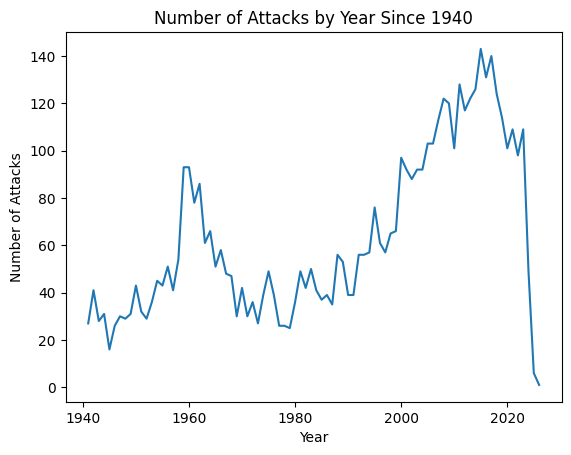

The number of attacks appear to be increasing relatively over time


In [229]:
#3
#print(new_df.dtypes)
#new_df['Year'].unique()
new_df['Year'] = new_df['Year'].fillna(0).astype(int)
#new_df['Year'].describe()
print('The year values range from 0, the value I choose to replace the nan with, to 2026')
after1940_df = new_df[(new_df['Year'] > 1940) & (new_df['Year'] <= 2026)]
attacks_by_year = after1940_df.groupby('Year').size()
attacks_by_year.plot(kind='line')
plt.title('Number of Attacks by Year Since 1940')
plt.ylabel('Number of Attacks')
plt.show()
print('The number of attacks appear to be increasing relatively over time')

<ipython-input-230-a88eeda9aa7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
<ipython-input-230-a88eeda9aa7a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Age_impute'] = after1940_df['Age'].fillna(impute_value)
<ipython-input-230-a88eeda9aa7a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Text(0, 0.5, 'Frequency')

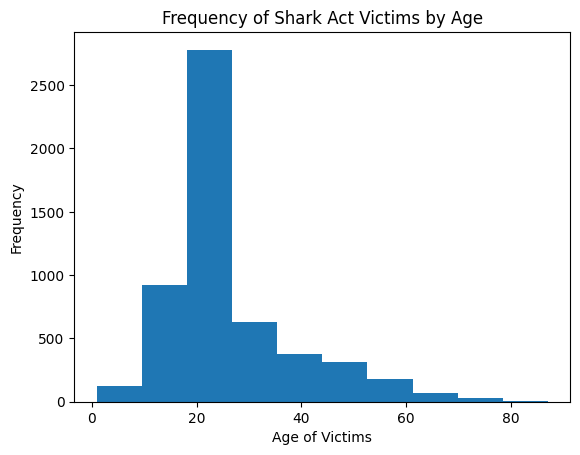

In [230]:
#4
after1940_df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
#after1940_df['Age'].unique()

impute_value = after1940_df['Age'].median()
after1940_df['Age_impute'] = after1940_df['Age'].fillna(impute_value)
after1940_df['Age_impute'] = after1940_df['Age_impute'].astype(int)

after1940_df['Age_impute'].unique()
after1940_df['Age_impute'].plot(kind='hist')
plt.title('Frequency of Shark Act Victims by Age')
plt.xlabel('Age of Victims')
plt.ylabel('Frequency')

In [233]:
#5
after1940_df['Sex'] = after1940_df['Sex'].str.strip()
invalid_sex = ['lli','M x 2']
after1940_df['Sex'] = after1940_df['Sex'].replace(invalid_sex, np.nan)
print(after1940_df['Sex'].unique(),'\n')
print(after1940_df['Sex'].value_counts(), '\n')

print('85.9% of the victims after 1940 are male (4281 of 4984)')

['M' 'F' nan] 

Sex
M    4281
F     703
Name: count, dtype: int64 

85.9% of the victims after 1940 are male (4281 of 4984)


<ipython-input-233-bed40c41a1f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Sex'] = after1940_df['Sex'].str.strip()
<ipython-input-233-bed40c41a1f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Sex'] = after1940_df['Sex'].replace(invalid_sex, np.nan)


In [251]:
#6
after1940_df['Type'] = after1940_df['Type'].fillna('Unknown').astype(str).str.strip()

invalid_types = ['Unknown','Invalid','Watercraft','Sea Disaster','Questionable','Boat','?','Unconfirmed','Unverified','Under investigation']
after1940_df['Type'] = after1940_df['Type'].replace(invalid_types, 'Unknown')

after1940_df['Type'].value_counts()
#print('74.3% of the attacks after 1940 were unprovoked (4037 of 5434)')

<ipython-input-251-dd9330c2263d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Type'] = after1940_df['Type'].fillna('Unknown').astype(str).str.strip()
<ipython-input-251-dd9330c2263d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Type'] = after1940_df['Type'].replace(invalid_types, 'Unknown')


,count
Type,
Unprovoked,4037
Unknown,880
Provoked,517


In [245]:
#7
after1940_df['Fatal Y/N'] = after1940_df['Fatal Y/N'].astype(str).str.strip().str.upper()
after1940_df['Fatal Y/N'].unique()

invalid_fatals = ['F','M','NAN','NQ','UNKNOWN','2017','Y X 2']
after1940_df['Fatal Y/N'] = after1940_df['Fatal Y/N'].replace(invalid_fatals, 'Unknown')

after1940_df['Fatal Y/N'].value_counts()

<ipython-input-245-196c57be2053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Fatal Y/N'] = after1940_df['Fatal Y/N'].astype(str).str.strip().str.upper()
<ipython-input-245-196c57be2053>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Fatal Y/N'] = after1940_df['Fatal Y/N'].replace(invalid_fatals, 'Unknown')


,count
Fatal Y/N,
N,4174
Y,802
Unknown,458


In [256]:
#8
#Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or lesslikely to be fatal when the attack is provoked or unprovoked?
#Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
pd.crosstab(after1940_df['Type'], after1940_df['Fatal Y/N'])
pd.crosstab(after1940_df['Sex'], after1940_df['Fatal Y/N'])

print('Of the fatal attacks, 83.5% were unprovoked suggesting attacks are more likely to be fatal when unprovoked. Of the fatal attcks, 88.2% wer male, suggesting attacks are more likely to be fatal when the victim is male. I personally don\'t love sharks and if I saw one at the beach I would be extremely scared.')

Of the fatal attacks, 83.5% were unprovoked suggesting attacks are more likely to be fatal when unprovoked. Of the fatal attcks, 88.2% wer male, suggesting attacks are more likely to be fatal when the victim is male. I personally don't love sharks and if I saw one at the beach I would be extremely scared.


In [271]:
#9
after1940_df['Species_split'] = after1940_df['Species '].astype(str).str.split()

def contains_white(species_list):
    return 'White' in species_list

whitesharks_df = after1940_df[after1940_df['Species_split'].apply(contains_white)]
whitesharks_df.shape
after1940_df.shape

print('8.59% of the attacks after 1940 were from white sharks (467 of 5434)')

8.59% of the attacks after 1940 were from white sharks (467 of 5434)


<ipython-input-271-41c4ba8a7fd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1940_df['Species_split'] = after1940_df['Species '].astype(str).str.split()


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

There is little research on how to clean data well. This paper provides an easy and effect system to output standardized tidy datasets where each variable is a column, each observation is a row, and each type of observational unit is a table. Tidy datasets are easier to manipulate and visualize, and having a consistent data structure across datasets is beneficial.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

By providing a standard way to organize values within a dataset, it will aid data exploration and analysis. Tidy data and tidy tools will make this process more efficient, removing the need to translate between different tools and allowing the focus to be on the actual exploration, not logisitics of data.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

When a dataset is tidy and standardized, its easier to explore as you can use the same tools and algorithms to pull information from them. However, when a dataset is messy, you can't use the same solutions to extract meaning from them as each one will be untidy in its own way.

It's hard to preicsely define variables and obserations because the relationship becomes less clear when data structures become more complicated.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Values = either quantitative or qualitative that belong to a variable and an observation
Variables = contains all values that measure an underlying attribute (height, temperature) across units
Observations = contains all values measured on the same unit (person, day) across attributes

  5. How is "Tidy Data" defined in section 2.3?

Each variable forms a column, each observation forms a row, and each type of observational unit forms a table

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

1) column headers are values, not variable names
2) mulitple variables are stored in both rows and columns
3) variables are stored in both rows and columns
4) multiple types of observational units are stored in the same table
5) a single observational unit is stored in multiple tables

Table 4 is messy because variables form both the rows and columns and the column headers are values, not variable names. "Melting" a dataset is turning columns into rows.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because the days of the month are column names instead of variable values, the element column combines multiple variable, and a single day's temperature measurements are spread across multiple columns. Table 12 is molten because it fixes these problems and each row represents a single observation of one day.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The chicken-and-egg problem is as follows: if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This means they have a circular dependency on one another. Tidy tools are useful because they are built specifically to work with tidy data. If the data is messy, the tools don't work. Tidy data is important because it makes the work of tidy tools possible.

Wickham hopes data wranglers will not only adopt his tidy principles, but expand on his framework to develope better data storage strategies and tools. He also hopes to see other aspects of data cleaning be optimiazed like parsing dates and numbers, identifying missing values, correcting character encodings (for international data), matching similar but not identical values (created by typos), verifying experimental design, filling in structural missing values, and model-based data cleaning that identifies suspicious values.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?